In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [107]:
#df = pd.read_excel("historical_join.xlsx", keep_default_na=False)
df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'SapHana'}),0.016208,0.013456,0.011315,0.698113,51.882504,0.011097,3.267928,1,1
1,frozenset({'SapHana'}),frozenset({'Firebird'}),0.013456,0.016208,0.011315,0.840909,51.882504,0.011097,6.183836,1,1
2,frozenset({'Informix'}),frozenset({'Firebird'}),0.018654,0.016208,0.014067,0.754098,46.526446,0.013765,4.000754,1,1
3,frozenset({'Firebird'}),frozenset({'Informix'}),0.016208,0.018654,0.014067,0.867925,46.526446,0.013765,7.430188,1,1
4,frozenset({'Informix'}),frozenset({'SapHana'}),0.018654,0.013456,0.011009,0.590164,43.859911,0.010758,2.407168,1,1
...,...,...,...,...,...,...,...,...,...,...,...
335,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL'}),0.040367,0.251376,0.019878,0.492424,1.958914,0.009730,1.474901,1,1
336,frozenset({'Ehcache'}),frozenset({'SQLite'}),0.109174,0.067890,0.013456,0.123249,1.815429,0.006044,1.063142,1,1
337,frozenset({'SQLite'}),frozenset({'Ehcache'}),0.067890,0.109174,0.013456,0.198198,1.815429,0.006044,1.111030,1,1
338,frozenset({'Redis'}),frozenset({'SQLite'}),0.096942,0.067890,0.011621,0.119874,1.765709,0.005039,1.059064,1,1


In [108]:
df.replace({'frozenset': ''}, regex=True, inplace=True)
#df.replace({ ''({'': ''}, regex=False, inplace=True)
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,({'Firebird'}),({'SapHana'}),0.016208,0.013456,0.011315,0.698113,51.882504,0.011097,3.267928,1,1
1,({'SapHana'}),({'Firebird'}),0.013456,0.016208,0.011315,0.840909,51.882504,0.011097,6.183836,1,1
2,({'Informix'}),({'Firebird'}),0.018654,0.016208,0.014067,0.754098,46.526446,0.013765,4.000754,1,1
3,({'Firebird'}),({'Informix'}),0.016208,0.018654,0.014067,0.867925,46.526446,0.013765,7.430188,1,1
4,({'Informix'}),({'SapHana'}),0.018654,0.013456,0.011009,0.590164,43.859911,0.010758,2.407168,1,1
...,...,...,...,...,...,...,...,...,...,...,...
335,({'Google Cloud Datastore'}),({'MySQL'}),0.040367,0.251376,0.019878,0.492424,1.958914,0.009730,1.474901,1,1
336,({'Ehcache'}),({'SQLite'}),0.109174,0.067890,0.013456,0.123249,1.815429,0.006044,1.063142,1,1
337,({'SQLite'}),({'Ehcache'}),0.067890,0.109174,0.013456,0.198198,1.815429,0.006044,1.111030,1,1
338,({'Redis'}),({'SQLite'}),0.096942,0.067890,0.011621,0.119874,1.765709,0.005039,1.059064,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [109]:
rules1 = df2[(df2['consequent support'] >= 0.06)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,
frozenset({'MySQL'}),0.049892,0.251376,0.038747,0.814103,3.238586,0.026206,inf,1,1
frozenset({'PostgreSQL'}),0.056208,0.153211,0.035535,0.734598,4.794680,0.026923,inf,1,1
frozenset({'H2'}),0.063478,0.149847,0.033202,0.627106,4.184972,0.023690,inf,1,1
frozenset({'Oracle'}),0.063550,0.122018,0.031921,0.624997,5.122156,0.024166,inf,1,1
frozenset({'Ehcache'}),0.079492,0.109174,0.024140,0.343613,3.147380,0.015461,1.417506,1,1
frozenset({'Redis'}),0.075416,0.096942,0.025195,0.397735,4.102813,0.017884,1.678327,1,1
frozenset({'SQLite'}),0.082896,0.067890,0.022521,0.440012,6.481262,0.016893,inf,1,1
frozenset({'MongoDB'}),0.085343,0.065443,0.022739,0.344107,5.258081,0.017154,1.507094,1,1
frozenset({'MS SQL Server'}),0.071045,0.064526,0.025592,0.488488,7.570403,0.021007,3.069516,1,1


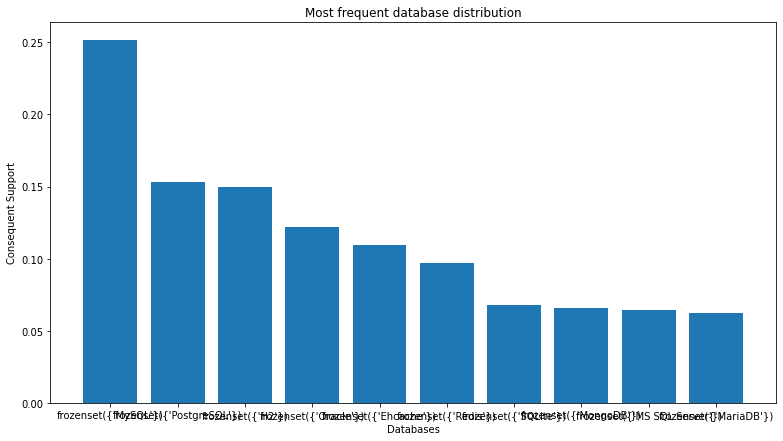

In [110]:
plt.figure(figsize=(13,7))
#plt.colorbar(orientation='horizontal')
plt.bar(rules1.index , rules2['consequent support'])
plt.title('Most frequent database distribution')
plt.xlabel("Databases")
plt.ylabel("Consequent Support")
plt.show() 

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [6]:
rules2 = df[(df['consequents'] == "({'MySQL'})") & (df['confidence'] > 0.7) ]
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
196,({'Firebird'}),({'MySQL'}),0.016208,0.251376,0.016208,1.000000,3.978102,0.012134,inf,1,1
197,({'SapHana'}),({'MySQL'}),0.013456,0.251376,0.013456,1.000000,3.978102,0.010073,inf,1,1
200,({'Amazon Redshift'}),({'MySQL'}),0.012538,0.251376,0.012538,1.000000,3.978102,0.009386,inf,1,1
201,({'MS Access'}),({'MySQL'}),0.018960,0.251376,0.018960,1.000000,3.978102,0.014194,inf,1,1
202,({'ClickHouse'}),({'MySQL'}),0.011621,0.251376,0.011621,1.000000,3.978102,0.008700,inf,1,1
204,({'Teradata'}),({'MySQL'}),0.010398,0.251376,0.010398,1.000000,3.978102,0.007784,inf,1,1
209,({'MS SQL Server'}),({'MySQL'}),0.064526,0.251376,0.064220,0.995261,3.959249,0.048000,157.959633,1,1
213,({'SAP Adaptive Server'}),({'MySQL'}),0.033639,0.251376,0.033028,0.981818,3.905773,0.024571,41.174312,1,1
214,({'IBM DB2'}),({'MySQL'}),0.050153,0.251376,0.048012,0.957317,3.808305,0.035405,17.539187,1,1
229,({'MariaDB'}),({'MySQL'}),0.062385,0.251376,0.055657,0.892157,3.549091,0.039975,6.941785,1,1


In [66]:
rules3 = [(df['consequents'] == "({'PostgreSQL'})") | (df['antecedents'] == "({'PostgreSQL'})")] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
116,({'PostgreSQL'}),({'PostGIS'}),0.153211,0.012538,0.012538,0.081836,6.526946,0.010617,1.075475,1,1
117,({'PostGIS'}),({'PostgreSQL'}),0.012538,0.153211,0.012538,1.000000,6.526946,0.010617,inf,1,1
118,({'PostgreSQL'}),({'ClickHouse'}),0.153211,0.011621,0.011621,0.075848,6.526946,0.009840,1.069499,1,1
119,({'ClickHouse'}),({'PostgreSQL'}),0.011621,0.153211,0.011621,1.000000,6.526946,0.009840,inf,1,1
120,({'PostgreSQL'}),({'Amazon Redshift'}),0.153211,0.012538,0.012538,0.081836,6.526946,0.010617,1.075475,1,1
121,({'Amazon Redshift'}),({'PostgreSQL'}),0.012538,0.153211,0.012538,1.000000,6.526946,0.010617,inf,1,1
122,({'PostgreSQL'}),({'Firebird'}),0.153211,0.016208,0.016208,0.105788,6.526946,0.013725,1.100178,1,1
123,({'Firebird'}),({'PostgreSQL'}),0.016208,0.153211,0.016208,1.000000,6.526946,0.013725,inf,1,1
124,({'PostgreSQL'}),({'SapHana'}),0.153211,0.013456,0.013456,0.087824,6.526946,0.011394,1.081529,1,1
125,({'SapHana'}),({'PostgreSQL'}),0.013456,0.153211,0.013456,1.000000,6.526946,0.011394,inf,1,1


In [42]:
rules4 = df[ (df['consequents'] == "({'H2'})") & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
106,({'SapHana'}),({'H2'}),0.013456,0.149847,0.013456,1.000000,6.673469,0.011439,inf,1,1
108,({'Firebird'}),({'H2'}),0.016208,0.149847,0.016208,1.000000,6.673469,0.013779,inf,1,1
126,({'Teradata'}),({'H2'}),0.010398,0.149847,0.010092,0.970588,6.477191,0.008534,28.905199,1,1
129,({'Informix'}),({'H2'}),0.018654,0.149847,0.018043,0.967213,6.454667,0.015248,25.929664,1,1
149,({'SAP Adaptive Server'}),({'H2'}),0.033639,0.149847,0.029664,0.881818,5.884787,0.024623,7.193602,1,1
161,({'MS Access'}),({'H2'}),0.018960,0.149847,0.015902,0.838710,5.597103,0.013061,5.270948,1,1
165,({'IBM DB2'}),({'H2'}),0.050153,0.149847,0.040061,0.798780,5.330637,0.032546,4.225002,1,1


In [43]:
rules5 = df[ (df['consequents'] == "({'Oracle'})") & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
68,({'SapHana'}),({'Oracle'}),0.013456,0.122018,0.013456,1.000000,8.195489,0.011814,inf,1,1
74,({'PostGIS'}),({'Oracle'}),0.012538,0.122018,0.012232,0.975610,7.995599,0.010703,35.997248,1,1
77,({'MS Access'}),({'Oracle'}),0.018960,0.122018,0.018349,0.967742,7.931118,0.016035,27.217431,1,1
79,({'SAP Adaptive Server'}),({'Oracle'}),0.033639,0.122018,0.032416,0.963636,7.897471,0.028311,24.144495,1,1
81,({'Firebird'}),({'Oracle'}),0.016208,0.122018,0.015291,0.943396,7.731593,0.013313,15.511009,1,1
86,({'IBM DB2'}),({'Oracle'}),0.050153,0.122018,0.044954,0.896341,7.345956,0.038835,8.469941,1,1
100,({'Informix'}),({'Oracle'}),0.018654,0.122018,0.015596,0.836066,6.851966,0.013320,5.355688,1,1
103,({'MS SQL Server'}),({'Oracle'}),0.064526,0.122018,0.053823,0.834123,6.836047,0.045949,5.292975,1,1
115,({'Amazon Redshift'}),({'Oracle'}),0.012538,0.122018,0.010092,0.804878,6.596369,0.008562,4.499656,1,1


In [91]:
rules6 = df[ (df['consequents'] == "({'Ehcache'})")]# & (df['confidence'] > 0.7) ]
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
137,({'Memcached'}),({'Ehcache'}),0.018349,0.109174,0.012538,0.683333,6.259104,0.010535,2.813134,1,1
188,({'Hazelcast'}),({'Ehcache'}),0.023853,0.109174,0.011621,0.487179,4.462400,0.009017,1.737110,1,1
251,({'Cassandra'}),({'Ehcache'}),0.030275,0.109174,0.011009,0.363636,3.330787,0.007704,1.399869,1,1
257,({'Elasticsearch'}),({'Ehcache'}),0.048624,0.109174,0.017431,0.358491,3.283653,0.012123,1.388640,1,1
269,({'Redis'}),({'Ehcache'}),0.096942,0.109174,0.033639,0.347003,3.178432,0.023056,1.364211,1,1
270,({'SAP Adaptive Server'}),({'Ehcache'}),0.033639,0.109174,0.011621,0.345455,3.164248,0.007948,1.360984,1,1
275,({'MS SQL Server'}),({'Ehcache'}),0.064526,0.109174,0.021713,0.336493,3.082162,0.014668,1.342602,1,1
283,({'MariaDB'}),({'Ehcache'}),0.062385,0.109174,0.020489,0.328431,3.008321,0.013678,1.326485,1,1
286,({'MongoDB'}),({'Ehcache'}),0.065443,0.109174,0.021407,0.327103,2.996152,0.014262,1.323866,1,1
288,({'Oracle'}),({'Ehcache'}),0.122018,0.109174,0.039755,0.325815,2.984352,0.026434,1.321336,1,1


In [95]:
rules7 = df[ (df['consequents'] == "({'Redis'})")] #& (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
73,({'Cassandra'}),({'Redis'}),0.030275,0.096942,0.023853,0.787879,8.127330,0.020918,4.257274,1,1
112,({'Solr'}),({'Redis'}),0.023853,0.096942,0.015291,0.641026,6.612473,0.012978,2.515662,1,1
155,({'Elasticsearch'}),({'Redis'}),0.048624,0.096942,0.026911,0.553459,5.709184,0.022198,2.022341,1,1
157,({'HBase'}),({'Redis'}),0.033333,0.096942,0.018349,0.550459,5.678233,0.015117,2.008844,1,1
163,({'DynamoDB'}),({'Redis'}),0.025382,0.096942,0.013761,0.542169,5.592718,0.011301,1.972469,1,1
167,({'MongoDB'}),({'Redis'}),0.065443,0.096942,0.033028,0.504673,5.205932,0.026683,1.823155,1,1
176,({'Hive'}),({'Redis'}),0.025994,0.096942,0.012232,0.470588,4.854333,0.009713,1.705776,1,1
224,({'MariaDB'}),({'Redis'}),0.062385,0.096942,0.021713,0.348039,3.590184,0.015665,1.385142,1,1
246,({'PostgreSQL'}),({'Redis'}),0.153211,0.096942,0.049541,0.323353,3.335537,0.034689,1.334608,1,1
259,({'SAP Adaptive Server'}),({'Redis'}),0.033639,0.096942,0.010703,0.318182,3.282191,0.007442,1.324485,1,1


In [96]:
rules8 = df[ (df['consequents'] == "({'SQLite'})") & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
24,({'SapHana'}),({'SQLite'}),0.013456,0.06789,0.013456,1.000000,14.729730,0.012542,inf,1,1
33,({'Firebird'}),({'SQLite'}),0.016208,0.06789,0.014985,0.924528,13.618052,0.013884,12.350459,1,1
51,({'Informix'}),({'SQLite'}),0.018654,0.06789,0.014985,0.803279,11.832078,0.013718,4.738226,1,1
56,({'MS Access'}),({'SQLite'}),0.018960,0.06789,0.013456,0.709677,10.453357,0.012168,3.210601,1,1


In [99]:
rules9 = df[(df['consequents'] == "({'MongoDB'})")]#& (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
58,({'Cassandra'}),({'MongoDB'}),0.030275,0.065443,0.019878,0.656566,10.032569,0.017896,2.721209,1,1
91,({'DynamoDB'}),({'MongoDB'}),0.025382,0.065443,0.011927,0.469880,7.179935,0.010266,1.762914,1,1
92,({'Solr'}),({'MongoDB'}),0.023853,0.065443,0.011009,0.461538,7.052480,0.009448,1.735605,1,1
93,({'Hazelcast'}),({'MongoDB'}),0.023853,0.065443,0.011009,0.461538,7.052480,0.009448,1.735605,1,1
105,({'Elasticsearch'}),({'MongoDB'}),0.048624,0.065443,0.021713,0.446541,6.823312,0.018530,1.688574,1,1
133,({'HBase'}),({'MongoDB'}),0.033333,0.065443,0.013761,0.412844,6.308411,0.011580,1.591667,1,1
166,({'Redis'}),({'MongoDB'}),0.096942,0.065443,0.033028,0.340694,5.205932,0.026683,1.417485,1,1
186,({'MariaDB'}),({'MongoDB'}),0.062385,0.065443,0.018349,0.294118,4.494228,0.014266,1.323955,1,1
220,({'MS SQL Server'}),({'MongoDB'}),0.064526,0.065443,0.015596,0.241706,3.693360,0.011374,1.232446,1,1
231,({'PostgreSQL'}),({'MongoDB'}),0.153211,0.065443,0.035474,0.231537,3.537971,0.025447,1.216137,1,1


In [100]:
rules10 = df[ (df['consequents'] == "({'MS SQL Server'})") & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
27,({'SapHana'}),({'MS SQL Server'}),0.013456,0.064526,0.012538,0.931818,14.440974,0.011670,13.720285,1,1
28,({'Firebird'}),({'MS SQL Server'}),0.016208,0.064526,0.014373,0.886792,13.743182,0.013327,8.263354,1,1
41,({'Amazon Redshift'}),({'MS SQL Server'}),0.012538,0.064526,0.010398,0.829268,12.851693,0.009589,5.479205,1,1
45,({'Informix'}),({'MS SQL Server'}),0.018654,0.064526,0.014679,0.786885,12.194857,0.013475,4.389532,1,1
52,({'IBM DB2'}),({'MS SQL Server'}),0.050153,0.064526,0.037920,0.756098,11.717720,0.034684,3.835443,1,1
54,({'SAP Adaptive Server'}),({'MS SQL Server'}),0.033639,0.064526,0.025076,0.745455,11.552779,0.022906,3.675076,1,1


In [104]:
rules11 = df[ (df['consequents'] == "({'MariaDB'})") & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
46,({'Firebird'}),({'MariaDB'}),0.016208,0.062385,0.012232,0.754717,12.097669,0.011221,3.822583,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [55]:
rules9 = df[((df['antecedents'] == "({'MariaDB'})") & (df['consequents'] == "({'MySQL'})")) | 
((df['antecedents'] == "({'MySQL'})") & (df['consequents'] == "({'MariaDB'})"))]
rules9


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
228,({'MySQL'}),({'MariaDB'}),0.251376,0.062385,0.055657,0.221411,3.549091,0.039975,1.204249,1,1
229,({'MariaDB'}),({'MySQL'}),0.062385,0.251376,0.055657,0.892157,3.549091,0.039975,6.941785,1,1


In [58]:
rules10 = df[((df['antecedents'] == "({'PostgreSQL'})") & (df['consequents'] == "({'PostGIS'})")) | 
((df['antecedents'] == "({'PostGIS'})") & (df['consequents'] == "({'PostgreSQL'})"))]
rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
116,({'PostgreSQL'}),({'PostGIS'}),0.153211,0.012538,0.012538,0.081836,6.526946,0.010617,1.075475,1,1
117,({'PostGIS'}),({'PostgreSQL'}),0.012538,0.153211,0.012538,1.000000,6.526946,0.010617,inf,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [105]:
rules12 = df2[(df2['lift'] > 20)] 
rules12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
10,({'Informix'}),({'SAP Adaptive Server'}),0.018654,0.033639,0.013456,0.721311,21.442623,0.012828,3.467530,1,1
6,({'Firebird'}),({'SAP Adaptive Server'}),0.016208,0.033639,0.013150,0.811321,24.118353,0.012605,5.121713,1,1
8,({'SapHana'}),({'SAP Adaptive Server'}),0.013456,0.033639,0.010703,0.795455,23.646694,0.010251,4.724431,1,1
3,({'Firebird'}),({'Informix'}),0.016208,0.018654,0.014067,0.867925,46.526446,0.013765,7.430188,1,1
11,({'SAP Adaptive Server'}),({'Informix'}),0.033639,0.018654,0.013456,0.400000,21.442623,0.012828,1.635576,1,1
5,({'SapHana'}),({'Informix'}),0.013456,0.018654,0.011009,0.818182,43.859911,0.010758,5.397401,1,1
2,({'Informix'}),({'Firebird'}),0.018654,0.016208,0.014067,0.754098,46.526446,0.013765,4.000754,1,1
7,({'SAP Adaptive Server'}),({'Firebird'}),0.033639,0.016208,0.013150,0.390909,24.118353,0.012605,1.615181,1,1
1,({'SapHana'}),({'Firebird'}),0.013456,0.016208,0.011315,0.840909,51.882504,0.011097,6.183836,1,1
0,({'Firebird'}),({'SapHana'}),0.016208,0.013456,0.011315,0.698113,51.882504,0.011097,3.267928,1,1


In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)